<a href="https://colab.research.google.com/github/marchiorog/projeto_fashion_mnist_api/blob/master/Projeto1Vis%C3%A3oComputacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# 1. Carregando o dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# 2. Normalização
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# 3. Redimensionamento para incluir canal (necessário para CNN)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [ ]:
# 4. Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
# 5. Construção do modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 6. Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
# 7. Treinamento
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.6877 - loss: 0.8573 - val_accuracy: 0.8162 - val_loss: 0.4761
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.8043 - loss: 0.5183 - val_accuracy: 0.8501 - val_loss: 0.4090
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 80ms/step - accuracy: 0.8344 - loss: 0.4444 - val_accuracy: 0.8541 - val_loss: 0.3876
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.8452 - loss: 0.4092 - val_accuracy: 0.8728 - val_loss: 0.3356
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8542 - loss: 0.3840 - val_accuracy: 0.8708 - val_loss: 0.3460
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8678 - loss: 0.3539 - val_accuracy: 0.8840 - val_loss: 0.3124
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.8710 - loss: 0.3429 - val_accuracy: 0.8913 - val_loss: 0.2969
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8743 - loss: 0.3343 - val_accurac

In [22]:
# 8. Avaliação
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nAcurácia no teste: {test_acc:.2%}')
print(f'\nLoss no teste: {test_loss:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8966 - loss: 0.2956

Acurácia no teste: 89.77%

Loss no teste: 28.52%


In [23]:
# 9. Relatório de classificação
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.83      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.79      0.87      0.82      1000
           5       0.96      0.99      0.98      1000
           6       0.71      0.68      0.70      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.99      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [24]:
# 10. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("\nMatriz de Confusão:\n", conf_matrix)


Matriz de Confusão:
 [[827   2  15  12   7   1 123   0  13   0]
 [  0 984   2   9   3   0   0   0   2   0]
 [  9   0 834  10  71   0  74   0   2   0]
 [ 12   8  12 905  32   0  26   0   5   0]
 [  1   2  47  28 867   0  54   0   1   0]
 [  0   0   0   0   0 986   0  11   1   2]
 [103   3  56  25 121   0 681   0  11   0]
 [  0   0   0   0   0  24   0 968   0   8]
 [  1   0   3   3   3   1   0   1 988   0]
 [  0   0   0   0   0  10   0  52   1 937]]


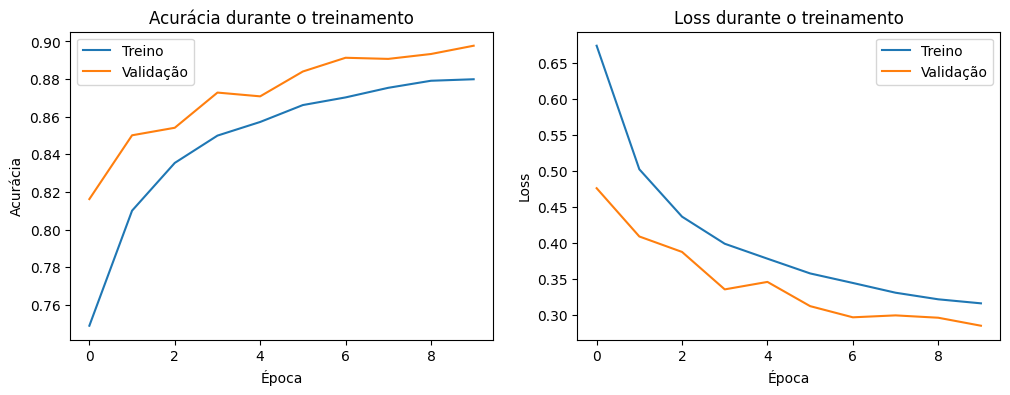

In [25]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
model.save("fashion_mnist_cnn_model.keras")


